# Лабораторная работа № 2
##          Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Для всех вариантов добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования. 
## 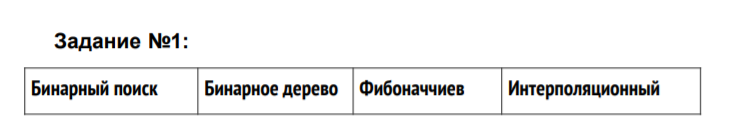

# Бинарный поиск

In [15]:
from random import randint
# Создание массива,
# его сортировка по возрастанию
# и вывод на экран
massiv = []
for i in range(10):
    massiv.append(randint(-10, 100))
massiv.sort()
print("Массив:")
print(massiv)
value = int(input()) # Искомое число вводится с клавиатуры
mid = len(massiv) // 2 # Середина массива
low = 0 # Нижняя граница массива
high = len(massiv) - 1 # Верхняя граница массива
while massiv[mid] != value and low <= high:
    if value > massiv[mid]:
        low = mid + 1
    else:
        high = mid - 1
    mid = (low + high) // 2
if low > high:
    print("Число не найдено")
else:
    print("Индекс искомого числа =", mid)

Массив:
[-7, -6, 6, 25, 64, 65, 85, 95, 97, 98]
-6
Индекс искомого числа = 1


# Фибоначчиев

In [1]:
def FibonacciSearch(lys, val):
    fibM_minus_2 = 0
    fibM_minus_1 = 1
    fibM = fibM_minus_1 + fibM_minus_2
    while (fibM < len(lys)):
        fibM_minus_2 = fibM_minus_1
        fibM_minus_1 = fibM
        fibM = fibM_minus_1 + fibM_minus_2
    index = -1;
    while (fibM > 1):
        i = min(index + fibM_minus_2, (len(lys)-1))
        if (lys[i] < val):
            fibM = fibM_minus_1
            fibM_minus_1 = fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
            index = i
        elif (lys[i] > val):
            fibM = fibM_minus_2
            fibM_minus_1 = fibM_minus_1 - fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
        else :
            return i
    if(fibM_minus_1 and index < (len(lys)-1) and lys[index+1] == val):
        return index+1;
    return -1
from random import randint
# Создание массива,
# его сортировка по возрастанию
# и вывод на экран
massiv = []
for i in range(10):
    massiv.append(randint(-10, 100))
massiv.sort()
print("Массив:")
print(massiv)
val = int(input())
index = FibonacciSearch(massiv, val)
print("Индекс искомого элемента =", index)

Массив:
[-1, 4, 13, 14, 18, 42, 46, 65, 95, 95]
13
Индекс искомого элемента = 2


# Интерполяционный поиск

In [17]:
def InterpolationSearch(massiv, val):
    low = 0
    high = (len(massiv) - 1)
    while low <= high and val >= massiv[low] and val <= massiv[high]:
        index = low + int(((float(high - low) / ( massiv[high] - massiv[low])) * ( val - massiv[low])))
        if massiv[index] == val:
            return index
        if massiv[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1
from random import randint
# Создание массива,
# его сортировка по возрастанию
# и вывод на экран
massiv = []
for i in range(10):
    massiv.append(randint(-10, 100))
massiv.sort()
print("Массив:")
print(massiv)
val = int(input())
index = InterpolationSearch(massiv, val)
print("Индекс искомого элемента =", index)

Массив:
[1, 6, 21, 37, 40, 47, 58, 63, 64, 91]
21
Индекс искомого элемента = 2


# 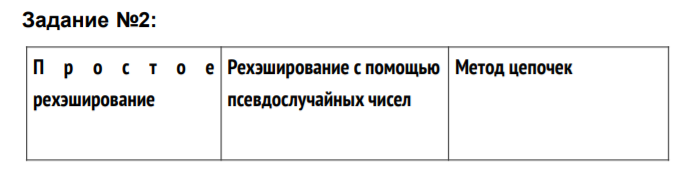

# Простое рехэширование

In [2]:
class HashTable:
    size = 20
 
    def __init__(self):
        self.data = [None] * self.size
 
    def __getitem__(self, key):
        h = self.get_hash(key)
        try:
            while self.data[h]:
                if self.data[h] and self.data[h]["key"] == key:
                    return self.data[h]
                h = self.get_rehash(h)
        except IndexError:
            return
 
    def __setitem__(self, key, value):
        h = self.get_hash(key)
        if self.data[h] is None:
            self.data[h] = {"key": key, "value": value}
            return
 
        next_h = self.get_rehash(h)
        try:
            while self.data[next_h] is not None:
                if self.data[next_h]["key"] == key:
                    self.data[next_h]["key"] = value
                    break
                next_h = self.get_rehash(next_h)
        except IndexError:
            raise
        self.data[next_h] = {"key": key, "value": value}
 
    def get_hash(self, name):
        return len(name) % self.size
 
    def get_rehash(self, oldhash):
        return oldhash + 1
 
    def delete(self, key):
        h = self.get_hash(key)
        if self.data[h]["key"] == key:
            self.data[h] = None
            return
 
        h_next = self.get_rehash(h)
        try:
            while self.data[h_next] is not None:
                if self.data[h_next]["key"] == key:
                    self.data[h_next] = None
                    break
                h_next = self.get_rehash(h_next)
        except IndexError:
            raise
        self.data[h_next] = None

# Рехэширование с помощью псевдослучайных чисел

In [3]:
import random
class random_rehash():
    # Конструктор, создание словаря
    def __init__(self):
        self.rhash=[None]*256
    
    def rand(self, element): #генерация псевдослучайного числа
        key=int(0)
        for i in range(len(element)):
            key=key+ord(element[i])
        return key
    
    def keys(self, key, l): # Формирование ключа
        random.seed(l)
        return int(key+((random.random()*10000000000000000)%1000))
            
    
    def add(self, element): # Добавление элемента 
        l=int(0)
        key=self.rand(element)
        key1=self.keys(key, l)%256
        while key1<len(self.rhash) and self.rhash[key1] is not None:
            l=l+1
            key1= self.keys(key, l)%256
        if key1<len(self.rhash):
            self.rhash[key1]=element
        else:
            print("Таблица заполнена")
                   
    def search(self, element): # Поиск элемента
        l=int(0)
        key=self.rand(element)
        key1=self.keys(key, l)%256
        while key1<len(self.rhash) and self.rhash[key1] is not None:
            if self.rhash[key1]==element:
                return key1
            else:
                l=l+1
                key1=self.keys(key, l)
        return None
    
    def deleted(self, element): # Удаление элемента
        l=int(0)
        keyn=self.rand(element)
        key1=self.keys(keyn, l)%256
        key=self.search(element)
        if key is not None:
            while key is not key1:
                l=l+1
                key1=self.keys(keyn, l)%256
            self.rhash[key]=None
            l=l+1
            key1=self.keys(keyn, l)%256
            while key1<len(self.rhash) and self.rhash[key1] is not None:
                el=self.rhash[key1]
                self.rhash[key1]=None
                self.add(el)
                l=l+1
                key1=self.keys(keyn, l)%256
            return "Элемент удален"
        else:
            return "Элемент не найден"
                 
    def pr(self): #
        for key, i in enumerate(self.rhash):
            if self.rhash[key] is not None:
                print(key, " ", i)

In [5]:
a = random_rehash()
a.add("пуньк")
a.add("пуньк")
a.add("пуньк")
a.add("пуньк")
a.add("пуньк")
print("до")
a.pr()
s=a.deleted("пуньк")
print(s)
a.pr()
print(a.search("пуньк"))

до
38   пуньк
51   пуньк
81   пуньк
158   пуньк
214   пуньк
Элемент удален
38   пуньк
51   пуньк
81   пуньк
214   пуньк
38


# Метод цепочек

In [10]:
class ChainMap:
    def __init__(self):
        self.size = 0
        self.data = []
        self._resize()
    
    def _hash(self, key):
        return hash(key) % len(self.data)
    
    def _insert(self, index, item):
        if self.data[index] is None:
            self.data[index] = [item]
            return True
        else:
            for i, item_ in enumerate(self.data[index]):
                if item_[0] == item[0]:
                    self.data[index][i] = item
                    return False
            self.data[index].append(item)
            return True
    
    def _resize(self):
        temp = self.data
        self.data = [None] * (2*len(self.data) + 1)
        for bucket in temp:
            if bucket is not None:
                for key, value in bucket:
                    self._insert(self._hash(key), (key, value))
    
    def __setitem__(self, key, value):
        if self.size + 1 > len(self.data) // 1.5:
            self._resize()
        if self._insert(self._hash(key), (key, value)):  
            self.size += 1
    
    def __getitem__(self, key):
        index = self._hash(key)
        if self.data[index] is not None:
            for key_, value in self.data[index]:
                if key_ == key:
                    return value
        raise KeyError()

# Задание № 3
## Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ниодин из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям.
## Написать программу, которая находит хотя бы один способ решения задач. 

In [10]:
n = int(input())
remainder = n % 6
if remainder == 2:
    even = list(range(1, n, 2))
    odd = list(range(2, n, 2))
    odd[1] = 0
    odd.append(4)
    result = even + odd
elif remainder == 3:
    even = list(range(3, n, 2))
    even.append(1)
    odd = list(range(4, n, 2))
    odd.append(0)
    odd.append(2)
    result = even + odd
else:
    even = list(range(1, n, 2))
    odd = list(range(0, n, 2))
    result = even + odd
    row = ['.']*n
for i in range(n):
    j = result[i]
    row = ['.']*n
    row[j]='Q'
    print(*row)
    row[j] ='.'

15
. . . Q . . . . . . . . . . .
. . . . . Q . . . . . . . . .
. . . . . . . Q . . . . . . .
. . . . . . . . . Q . . . . .
. . . . . . . . . . . Q . . .
. . . . . . . . . . . . . Q .
. Q . . . . . . . . . . . . .
. . . . Q . . . . . . . . . .
. . . . . . Q . . . . . . . .
. . . . . . . . Q . . . . . .
. . . . . . . . . . Q . . . .
. . . . . . . . . . . . Q . .
. . . . . . . . . . . . . . Q
Q . . . . . . . . . . . . . .
. . Q . . . . . . . . . . . .


# Задача

In [3]:
def maxCoins(massiv):
    me = 0
    while len(massiv)>0:
        threeCoins=[]
        for i in range(2):
            threeCoins.append(massiv.pop(massiv.index(min(massiv))))       
            me += threeCoins[1]
            return me

# Вывод

## В данной лабораторной работе были изучены методы поиска чисел в массиве. Также было изучено, что такое хэш-таблица и функции рехэширования (простое рехэширование и рехэширование с псевдослучайными числами). Было изучено, что такое колизия и способы ее решения (метод цепочек). 